In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read the dataset

In [2]:
df =pd.read_csv("/content/DoctorVisits-DA.csv")
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


#Display the information of the datasets


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [5]:
# Find out the total no of people based on theri illness
df['illness'].value_counts()

,count
illness,
1,1638
0,1554
2,946
3,542
4,274
5,236


In [6]:
# Find out the total no of gender
df['gender'].value_counts()



,count
gender,
female,2702
male,2488


In [7]:
#Number of Duplicates found in the Dataset
df.duplicated().sum()

0

In [10]:
#Calculate the maximum, minimum, and median income from the 'income' column.
m=df['income'].max()
mi=df['income'].min()
me=df['income'].median()
print(m)
print(mi)
print(me)


1.5
0.0
0.55


In [11]:
#Group the dataset by 'gender' and sum the 'reduced' days of activity due to illness for males and females separately.
df.groupby('gender')['reduced'].sum()


,reduced
gender,
female,2636
male,1837


<Axes: >

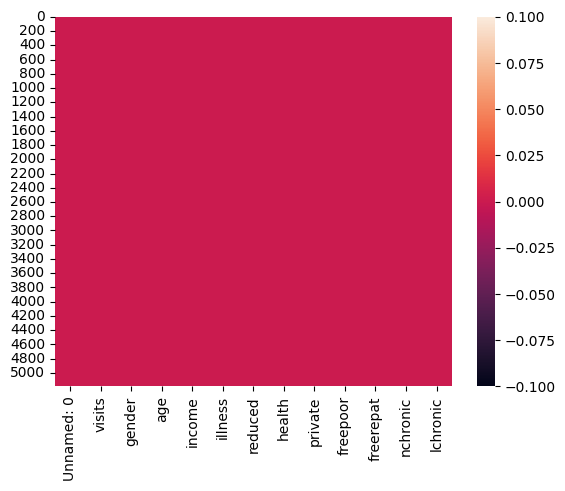

In [12]:
#Visualize missing values in the dataset using a heat map chart to identify any missing data.
sns.heatmap(df.isnull())

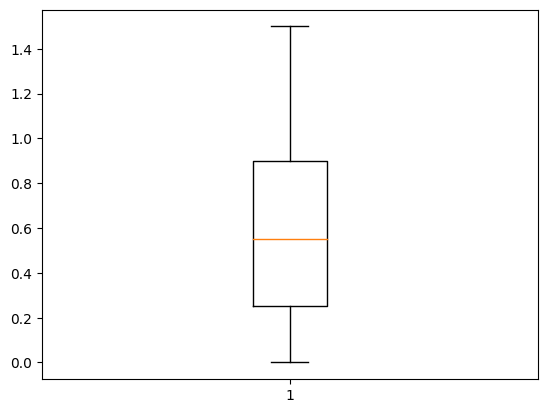

In [32]:
#visualize and analysis income
y=list(df.income)
plt.boxplot(y)
plt.show()

In [33]:
df.groupby('gender')['reduced'].mean()

,reduced
gender,
female,0.975574
male,0.738344


In [17]:
#Calculate the correlation matrix for the dataset to identify which variables are mostly correlated.
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
correlation_matrix



,Unnamed: 0,visits,age,income,illness,reduced,health
Unnamed: 0,1.000000,-0.521645,-0.016322,0.074632,-0.290047,-0.245314,-0.194966
visits,-0.521645,1.000000,0.124537,-0.076840,0.223552,0.418954,0.193272
age,-0.016322,0.124537,1.000000,-0.271073,0.204984,0.094745,0.018616
income,0.074632,-0.076840,-0.271073,1.000000,-0.148812,-0.047545,-0.085790
illness,-0.290047,0.223552,0.204984,-0.148812,1.000000,0.218116,0.360110
reduced,-0.245314,0.418954,0.094745,-0.047545,0.218116,1.000000,0.280208
health,-0.194966,0.193272,0.018616,-0.085790,0.360110,0.280208,1.000000


In [19]:
#Analyze how the 'income' of people affects the 'visits' to the hospital by calculating the correlation between these two variables
# Calculate the correlation between 'income' and 'visits'
correlation = df['income'].corr(df['visits'])

# Print the correlation coefficient
print(f"Correlation between income and visits: {correlation}")

Correlation between income and visits: -0.07683982934758851


In [20]:
#Count the number of males and females affected by illness and prepare the data for visualization.
# Group data by gender and illness, then count occurrences
gender_illness_counts = df.groupby(['gender', 'illness'])['illness'].count().reset_index(name='count')

# Display the prepared data
print(gender_illness_counts)

    gender  illness  count
0   female        0    679
1   female        1    834
2   female        2    531
3   female        3    333
4   female        4    167
5   female        5    158
6     male        0    875
7     male        1    804
8     male        2    415
9     male        3    209
10    male        4    107
11    male        5     78


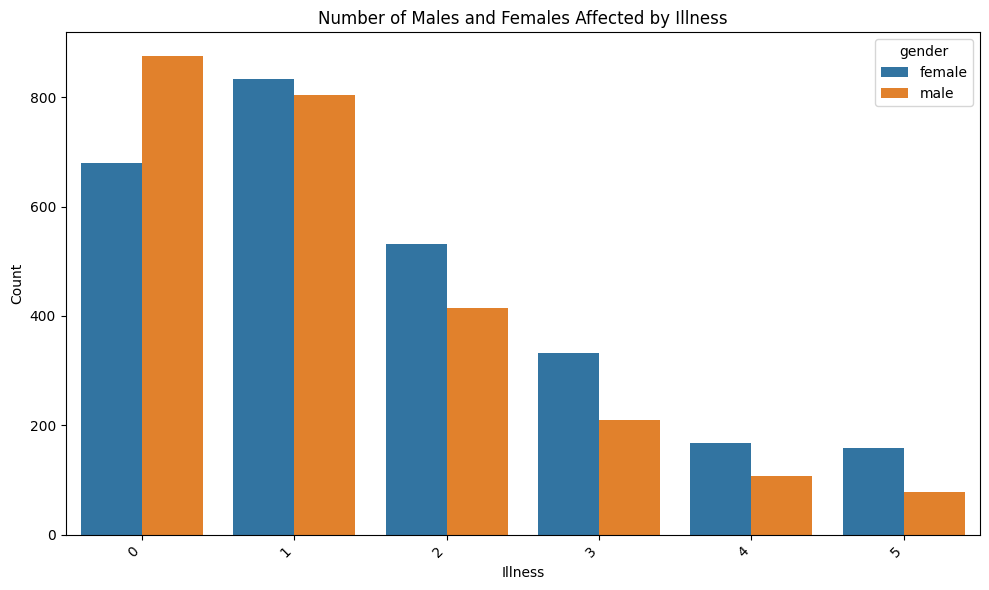

In [21]:
#Visualize the number of males and females affected by illness using a suitable chart.

gender_illness_counts = df.groupby(['gender', 'illness'])['illness'].count().reset_index(name='count')

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='illness', y='count', hue='gender', data=gender_illness_counts)
plt.title('Number of Males and Females Affected by Illness')
plt.xlabel('Illness')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


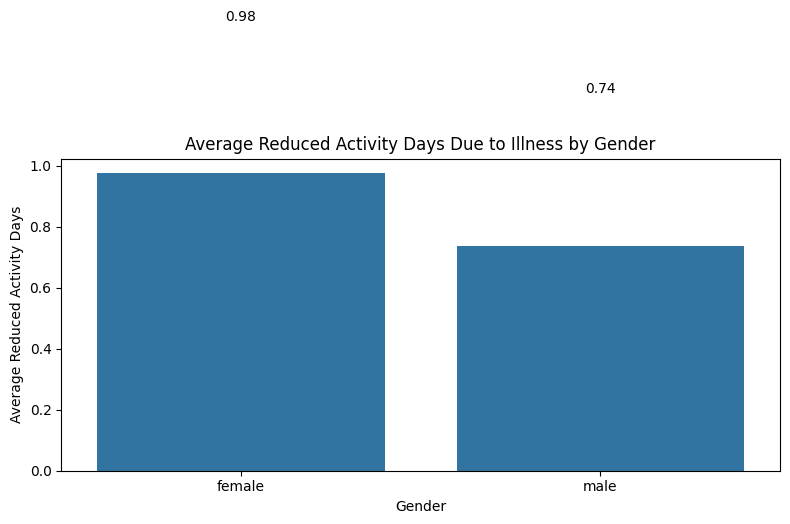

In [30]:
#Plot a bar chart to analyze the reduced days of activity due to illness based on gender.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average reduced activity days by gender
reduced_activity_by_gender = df.groupby('gender')['reduced'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='reduced', data=reduced_activity_by_gender)
plt.title('Average Reduced Activity Days Due to Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Reduced Activity Days')

# Display the values on top of the bars
for index, row in reduced_activity_by_gender.iterrows():
    plt.text(index, row['reduced'] + 0.5, f"{row['reduced']:.2f}", ha='center')

plt.tight_layout()
plt.show()

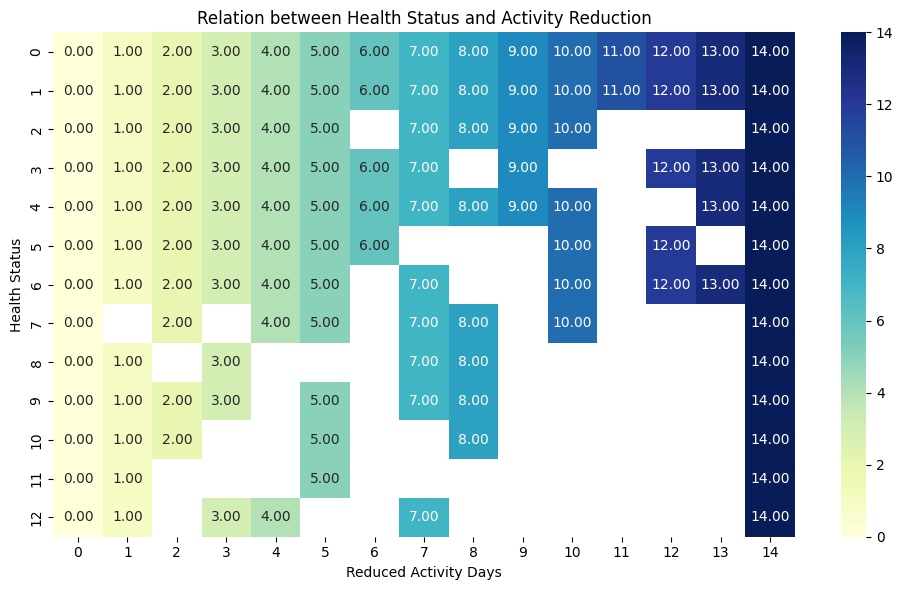

In [31]:
#Visualize the relation between health status and activity reduction using a heat map chart

# Group data by health status and activity reduction, then calculate the average
health_activity_reduction = df.groupby(['health', 'reduced'])['reduced'].mean().reset_index(name='avg_reduction')

# Create a pivot table for the heatmap
health_activity_pivot = health_activity_reduction.pivot_table(index='health', columns='reduced', values='avg_reduction')


# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(health_activity_pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Relation between Health Status and Activity Reduction')
plt.xlabel('Reduced Activity Days')
plt.ylabel('Health Status')
plt.tight_layout()
plt.show()



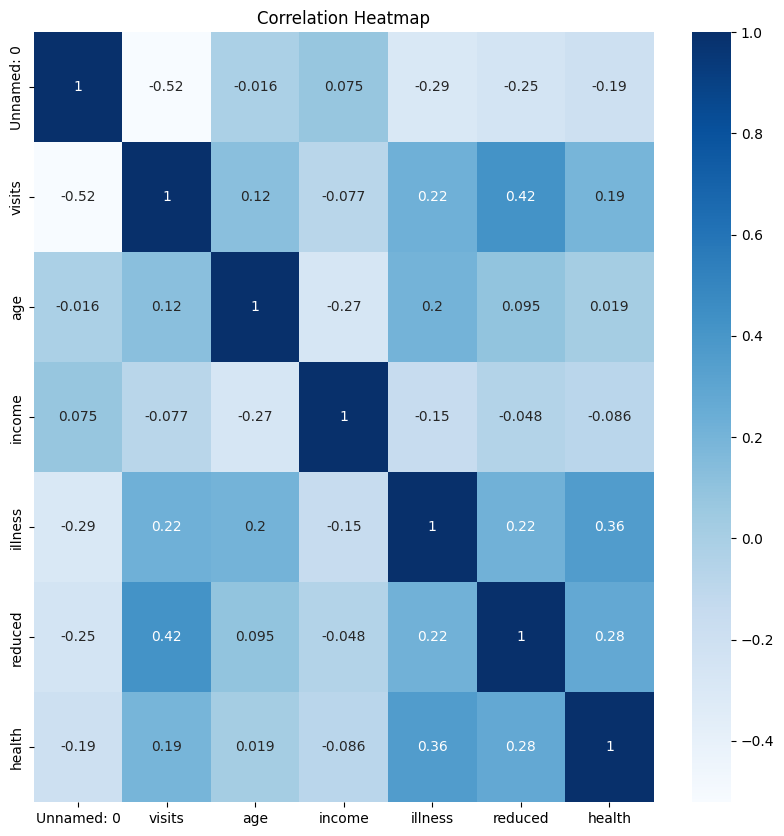

In [41]:
#find out the correlation between variables in the given datasets  correlation between  diffrent varisble
plt.figure(figsize=(10, 10))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),cbar=True, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


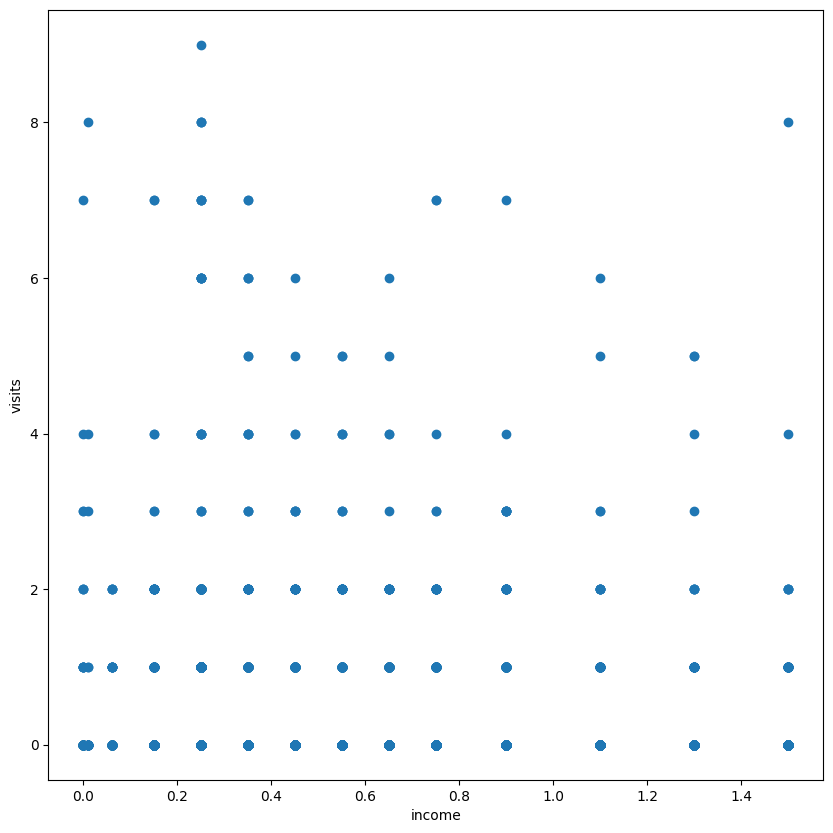

In [42]:
#visualize the relation between income and visit
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')
plt.show()



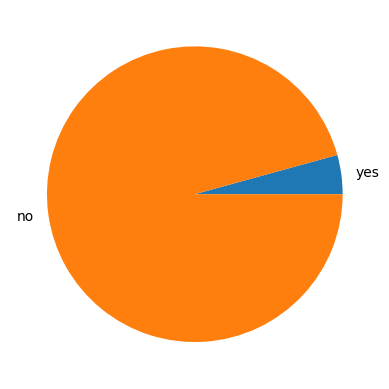

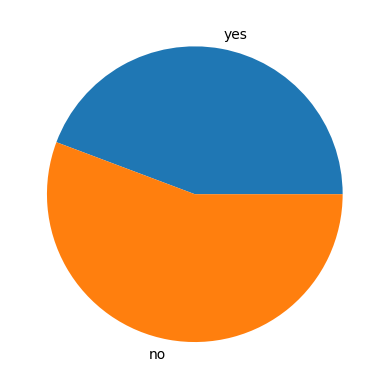

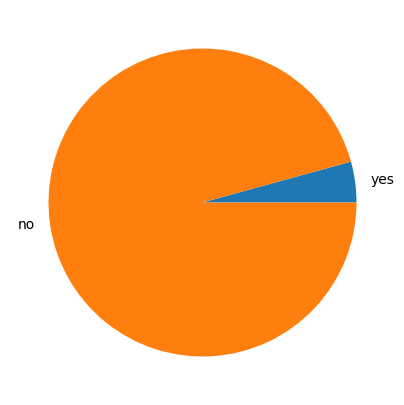

In [45]:
#Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance.

label=['yes','no']

Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']

x=[Y.shape[0],N.shape[0]]
plt.pie(x,labels=label)
plt.show()



# %of peopele having private
Y=df[df['private']=='yes']
N=df[df['private']=='no']

x=[Y.shape[0],N.shape[0]]
plt.pie(x,labels=label)
plt.show()

# %of people getting govt and private

Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.show()



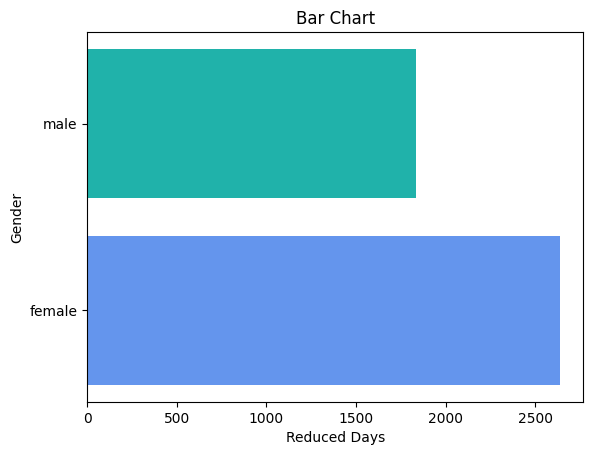

In [46]:
#Plot bar chart to analyse the reduced days of activity due to illness based on Gender

db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()

#creating the bar chart

plt.barh(db['gender'],db['reduced'],color=['cornflowerblue','lightseagreen'])


#adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('Reduced Days')
plt.ylabel('Gender')
plt.show()

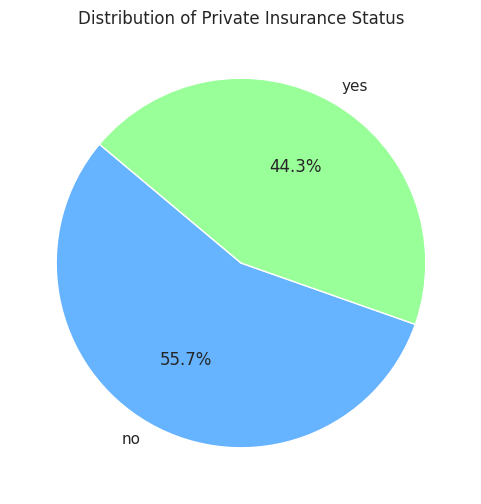

In [48]:
#A pie chart to show the distribution of individuals based on private insurance status.
sns.set(style="whitegrid")

# 1. Pie chart for private insurance status
private_counts = df['private'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(private_counts, labels=private_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66b3ff", "#99ff99"])
plt.title("Distribution of Private Insurance Status")
plt.show()

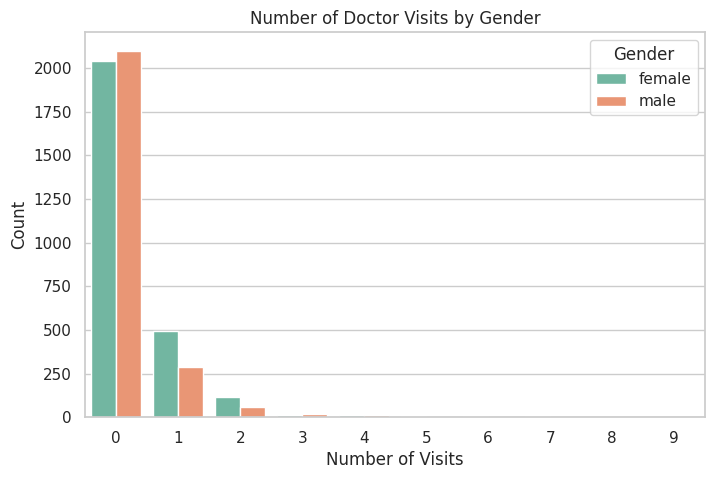

In [49]:

#A bar chart for the number of visits by gender.

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='visits', hue='gender', palette="Set2")
plt.title("Number of Doctor Visits by Gender")
plt.xlabel("Number of Visits")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

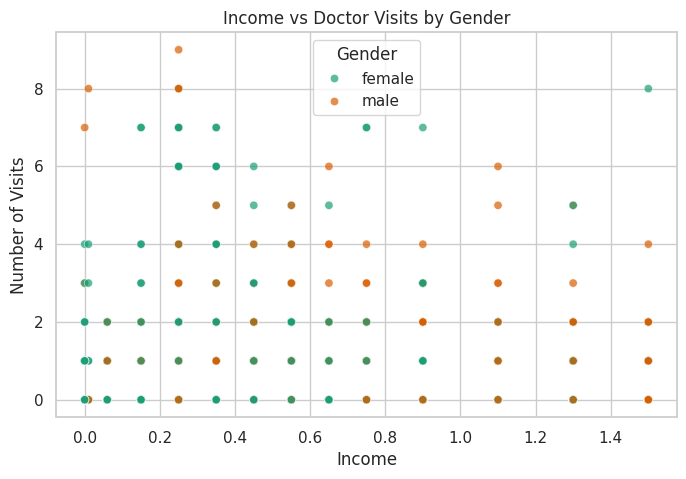

In [50]:
#A scatter plot to visualize the relationship between income and doctor visits.




plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='income', y='visits', hue='gender', palette="Dark2", alpha=0.7)
plt.title("Income vs Doctor Visits by Gender")
plt.xlabel("Income")
plt.ylabel("Number of Visits")
plt.legend(title="Gender")
plt.show()

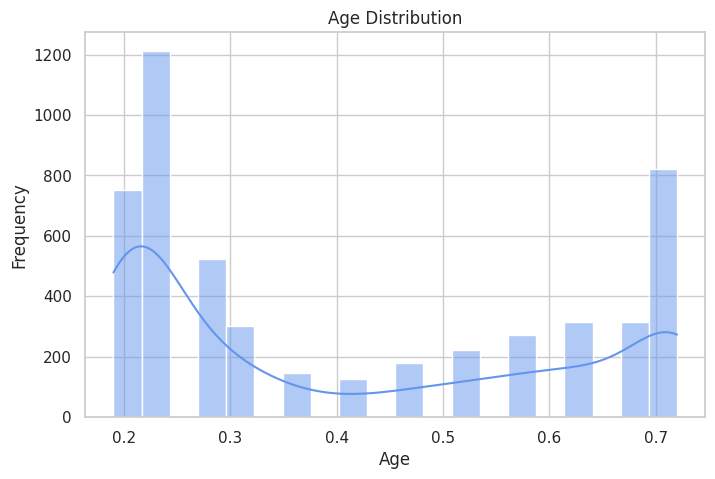

In [52]:
#Histogram of Age Distribution: To understand the age demographics in the dataset.
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=20, kde=True, color="#6495ED")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()




<ipython-input-53-2dad540342a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='health', y='visits', palette="Pastel1")


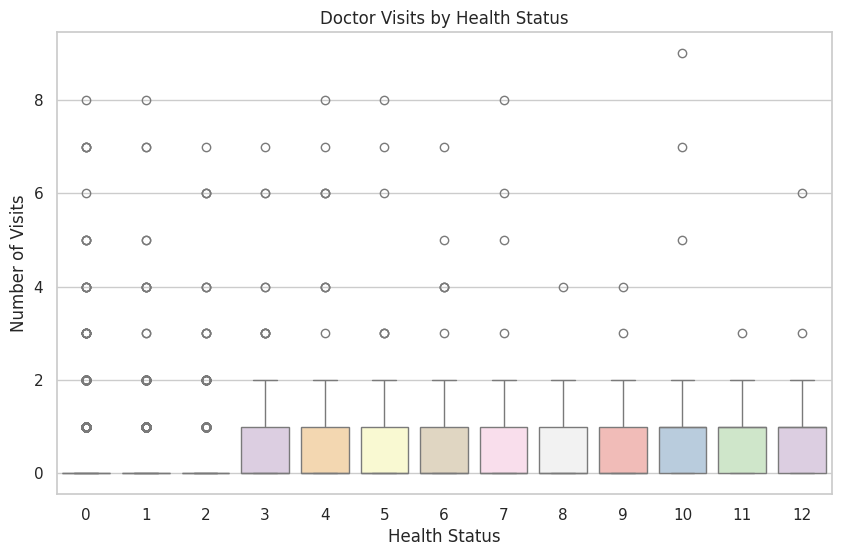

In [53]:
# 2. Box Plot of Visits by Health Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='health', y='visits', palette="Pastel1")
plt.title("Doctor Visits by Health Status")
plt.xlabel("Health Status")
plt.ylabel("Number of Visits")
plt.show()

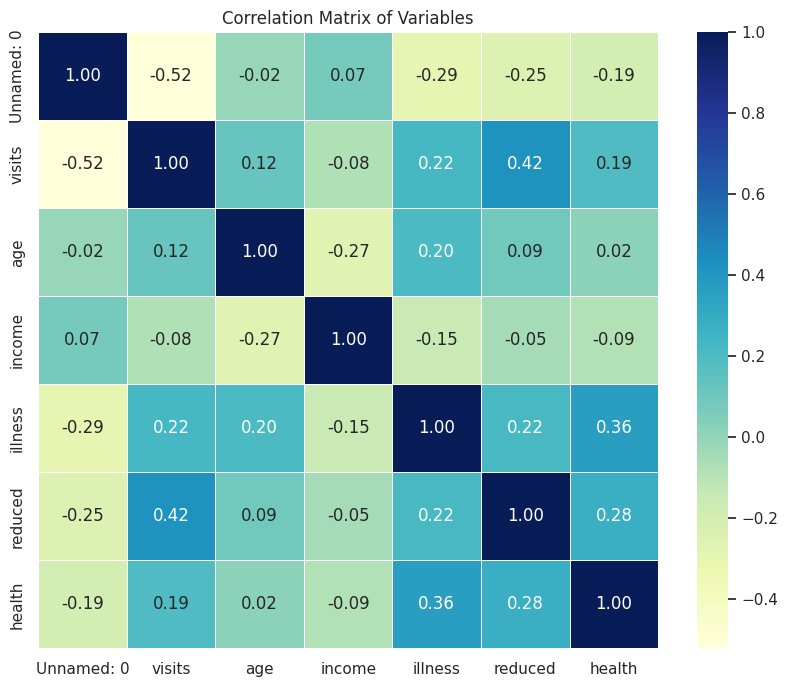

In [54]:
# 3. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=.5, fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()